<h1>
<center>
Module 8: Artificial Neural Nets
</center>
</h1>
<div class=h1_cell>
<p>
Deep learning is in the news and I think it is important for you to gain insight into its underlying mechanism. Spoiler alert: it is not that complicated. At least the basic theory is relatively straightforward. There are many many twiddles that are complex. But we can get a handle on the basics without too much difficulty (he says glibly).
  <p>
    The underlying idea of deep learning comes from an idea called neural nets (and before that, perceptrons). This can be a bit misleading. While the early work might have used the human brain as its model, with neurons firing, current deep learning research has dropped the brain connection.
    <p>
      This week we will build a way simple neural net. But even this simple net shows off all the pieces we need to grapple with. So let's get going.
</div>

<h2>You have seen numpy before - we will be using it again</h2>

We will use it to build 1d and 2d matrices. You could do the same thing with nested lists. But numpy has been honed to give fast processing so it is the go to library for working with neural net models.


In [0]:
import numpy as np

<h2>Our First Neural Net</h2>
There is a lot of jargon around neural nets. I'll introduce you to some of it and note when it is jargon you might want to remember. First, what we will call a neural net is sometimes referred to as an artifical neural net or ANN (jargon). Take a look at the ANN below then let's talk about it.

<img src='https://www.dropbox.com/s/09vo4h9mufmo6tn/Screenshot%202019-02-01%2015.23.42.png?raw=1'>

<h2>The Input layer</h2>

Every ANN has an input layer. There is something called the input set or feature set (jargon). You can see that we have 3 circles, also called nodes (jargon), in the net above. The general idea is that we supply 3 values for the input and crank the net (my jargon) to get an output. 
<p>
  It is totally fitting for you to think of the 3 input nodes as 3 columns in a table. The input set is the entire set of rows. We feed one row at a time to the net which pulls out the values of the 3 columns as input. Make sense?
<p>
You can view x1 as a feature, x2 as a feature and x3 as a feature. A feature of what? Well, if we were working with the titanic data, maybe x1 is Age, x2 is Gender and x3 is PClass. The rows of the titanic table would equal the feature set, where each row is called a sample (jargon).
<p>
 Is there any magic about having 3 nodes in input layer? No. We are using 3 to keep things simple. But it is more typical to have many more nodes. For Titanic and Loan tables we would probably have around 10 nodes x1 through x10. If we were working with a 10 by 10 image of pixels, we would have 100 input nodes, one for each pixel.
  <p>
    Do the input values have to be of a specific form? They have to be numeric. And common practice is to normalize them to fall between 0 and 1. In our example we will use binary values. You can read this as x1,x2 and x3 correspond to specific features of some object. Making them binary says if x1 is 1 then the feature x1 is present in the current object, etc. Not unlike ohe, right? But the caveat is that you do not have to one-hot encode them. You could feed raw values from the Age column, for instance. They are numbers, right?
    <p>
      Let's build a feature set.  Remember, each item in this set is called a sample (analogous to a row).

In [0]:
feature_set = np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])  #5 samples of 3 values each
print(feature_set.shape)
feature_set


(5, 3)


array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])

The shape of the matrices we create with numpy is important. We have to match them up. We will run into this next.

<h2>The Output layer</h2>
​
Every ANN has an output layer. As the term "layer" implies, there can be more than one output node. We will get back to this later. For now we have only a single output node that corresponds cleanly with what we have been calling the target column. So if we are working with Titanic, the ouptut node would produce either 1 or 0 for every sample. We will see that it actually produces a value between 0 and 1 that we can view as the appoximation to a binary value. So if we get an output of `.7` we could view that as leaning toward `1`. A value of `.2` is leaning toward `0`.
<p>
  The output of an ANN is by convention called `z`.
<p>
Let's build the actual values we expect to be produced for the 5 samples. We can then later compare what our net produces against the actuals. There is a bit of a gotcha in how to use numpy to define the actuals. Your first shot might be as below.
<p>

In [0]:
test_labels = np.array([1,0,0,1,1])  #5 actual values that go with the 5 samples - similar to values in Survived column
print(test_labels.shape)
test_labels

(5,)


array([1, 0, 0, 1, 1])

The problem is that we want the actuals to have the shape `(5, 1)` to align with the samples shape of `(5,3)`. Let's look at alternative ways to add a new dimension. First, I will use `numpy` to expand `test_labels` into the shape `(5, 1)`.

In [0]:
labels1 = np.expand_dims(test_labels, axis=1)  # Equivalent to test_labels[:,np.newaxis]
print(labels1.shape)
labels1

(5, 1)


array([[1],
       [0],
       [0],
       [1],
       [1]])

As an alternative, I can start with a nested list and reshape it.



In [0]:
labels2 = np.array([[1,0,0,1,1]])  #note now nested
print(labels2.shape)  #before shape
labels2 = labels2.reshape(5,1)  #this should now align with the samples shape
print(labels2.shape)  #after shape
labels2

(1, 5)
(5, 1)


array([[1],
       [0],
       [0],
       [1],
       [1]])

In [0]:
labels = labels2  #go ahead and use labels2 (which is equiv to labels1)

<h2>Let's take stock</h2>

We have our input feature set, which consists of 5 samples (rows). For now you can think of this as a reworked version of the Titanic table or Loan table with only 3 columns in use and 5 rows of data.
<p>
  We have the actual value of the target column for each sample. Would be equivalent to the `Survived` column.
  <p>
    Next up are the internals of the net.

<h2>The weights</h2>
Focus on the vairalbes w1, w2 and w3. These stand for the weights associated with the connections or links from the 3 input nodes to the output node. I tend to think of the weights actually being part of the output node but they are typically drawn on the links themselves. It is these weights that are the key to everything. The goal is to learn (jargon) them. We will start them off as random numbers. We will see later how we will adjust them depending if we predicted right or wrong.
<p>
  The typical way to choose the initial weights is as random numbers drawn from a uniform distribution between 0 and 1. The cool thing about the `rand` method is that it allows us to specify the shape of numbers we want. In our case we want a 3 x 1 shape to match up with the 3 values of the input nodes.
  <p>
    One more thing. I am using a seed to make sure I get the same random numbers every time I run this notebook. Helps with debugging.


In [0]:
np.random.seed(42)  #useful for debugging
weights = np.random.rand(3,1)  
print(weights.shape)
weights

(3, 1)


array([[0.37454012],
       [0.95071431],
       [0.73199394]])

<h2>The bias</h2>

It's kind of confusing the way the tree is drawn above. There is actually a 4th link coming into the output node called the bias (jargon). One way to view it is as a bias node with a constant value of 1 (or 0 if you want to shut the bias off). It has a weight on the link. And that weight starts out as random.
<p>
  <img src='https://www.dropbox.com/s/2tyn4r20v83m0do/Screenshot%202019-02-24%2009.16.54.png?raw=1'>

In [0]:
bias = np.random.rand(1)
print(bias.shape)
bias


(1,)


array([0.59865848])

We can leave the bias in this shape given it does not align with anything (other than a phantom node that is always 1).

<h2>The formula</h2>

Here is just the ouput node from the figure.

<img src='https://www.dropbox.com/s/1ckfzkhr4997db4/Screenshot%202019-02-05%2015.05.11.png?raw=1'>

You can see  a summation xi`*`wi for i=1,n. In our case n = 3. So it says to mupltiply each input value by its corresonding link weight. And sum that all up. I suppose I could write a for-loop to do this. But numpy has some operations that will make it trivial. That is why we took time to get our matrices in the right shape.
<p>
  The bias gets added to the final sum.
  <p>
    Check out code below.

In [0]:
#look at first sample from feature_set - this is the raw input coming in

sample0 = np.expand_dims(feature_set[0], axis=1) #transform to match up with weight shape
print(sample0.shape)
sample0


(3, 1)


array([[0],
       [1],
       [0]])

In [0]:
XW = np.multiply(sample0, weights)  #let numpy do its thing
print(XW.shape)
XW


(3, 1)


array([[0.        ],
       [0.95071431],
       [0.        ]])

We now have each of the results of `xi*wi`. Out next step is to sum them.

In [0]:
#sum the column directly - gets you the number in an array which is what we want

XW_sum = np.sum(XW, axis=0)
XW_sum

array([0.95071431])

Now we need to add bias.

In [0]:
raw_output = XW_sum + bias
raw_output

array([1.54937279])

<h2>Next way big idea: activation functions</h2>

Why aren't we done? I can just use `raw_output` as the node's output. I am going to give you the intuition and punt on the details. I strongly suggest you take the CIS Machine Learning class to delve deeper. In fact I will keep repeating this so much that I will just put `CIS472` in parens to signal that that course provides details. Ok, back to the intuition. My claim is that all we really have now is a linear formula. So raw_output is the linear result of multiplying inputs by weights and summing. Because of this, we will only be effective looking at problems with a linear solution. The bad news is that the vast number of problems we want to model with an ANN are non-linear. And worse, even the linear ones have much simpler means to use to model, e.g., linear regression. So we are going to introduce a non-linear function that will take the raw_output result and transform it into the actual output z. This function is called the activation function (jargon).
<p>
  Our activation function, shown as sigma in the formula, will  help us grapple with highly non-linear problems. I am going to use a function called sigmoid. There are other alternatives with their pluses and minuses. In particular, the leaky-RELU function has become popular recently (CIS472). Here is the sigmoid function:
  <br>
  <img src='https://www.dropbox.com/s/gfa7zlka1oqnc9a/Screenshot%202019-02-06%2012.39.55.png?raw=1'>
  <br>
  Let's define it in code.

In [0]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))

We can get some intition of what is going on by plotting it on some random values. Notice that the ouput is between 0 (for large negative values) and 1 (for large positive values). The decimal point is a bit hard to discern on the y axis but it is there.

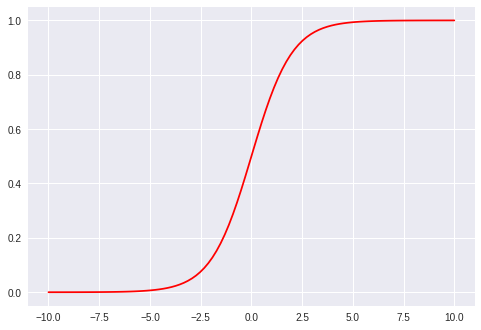

In [0]:
#randomly generate 100 linearly-spaced points between -10 and 10
input = np.linspace(-10, 10, 100)

from matplotlib import pyplot as plt  
plt.plot(input, sigmoid(input), c="r")  

Ok, ready to try it on our raw_output.

In [0]:
z = sigmoid(raw_output)
z

array([0.82482312])

<h2>How did we do?</h2>

We have an ouput very close to 1. How far are we off from the actual value? If the actual value is 0, we are way off. If it is 1, we are close. What we need is an error function (jargon). This is also called the cost function (jargon) or loss function (jargon). It gives us a way to compute how far we are off. I am going to use a standard function called Mean-Squared Error. Here it is.
<br>
<img src='https://www.dropbox.com/s/cltfyoukbg3h0cb/Screenshot%202019-02-01%2015.25.35.png?raw=1'>
<br>
Our n is 1: we are computing the error for a single sample at a time, i.e., a batch size of 1 (jargon). So this simplfies to below code.

In [0]:
def mse(z,y):
  return (z-y)**2
  

In [0]:
cost = mse(z, labels[0])  #looking at label for 0th sample
cost

array([0.03068694])

Pretty small cost/error, right? Looks like the actual value was 1. So we were close.
<p>
  We are now done with what is called forward propogation. We have produced a result in `z` for the first sample and computed the error, which we are calling the cost. Now comes the fun part: "learning". You want to delve into machine learning? We are now at the learning stage.

<h2>Backward Propogation</h2>

Let me first give you the intuition of what learning means in an ANN. We have an error, right? What I want to do is reduce that error. How can I reduce the error? The only knobs I have to turn are the weights (including the bias weight). So I want to change the weights to reduce the error.
<p>
  Next question: how can we change each weight to reduce the error? Here is one idea. We have 4 weights. Keep trying different combinations of the 4 to find a combo that is closer to 1 than `0.82482312` and hence reduces our error. I'll call this the brute force approach. It does not work. At least not for ANNs with hundreds or even thousands of weights. We need a more principled way to do weight changing.
  <p>
  I'll give you a way that uses partial differential-equations and the chain rule. Again, I am going to give you a high-level view of things (CIS472). The intuition is that I want to make the mse result smaller. The mse function has 2 parameters, but I can only control 1 of them, `z`. So the question I ask is how to change z to make mse(z,y) smaller? That is a partial differential-equation question I claim. How does a change in one of the parameters (a partial of the full set of parameters) affect the output? Answer: take the partial derivative of mse with respect to z. You can find the full derivation on the web and CIS472. I'll just tell you that it is `(z-y)`.

In [0]:
#derivate of the mse cost function with respect to z

def mse_der(z,y):
  return z-y

Let's apply it to what we have for sample 1.

In [0]:
mse_deriv_value = mse_der(z, labels[0])
print(mse_deriv_value)

[-0.17517688]


Cool. We now know we need to make a change to `z` of `-.175` to reduce our cost. But we now have to ask a follow up question. How did we get z in the first place? Looking backward in the net, we can see that the sigmoid function produced z. You got it. We will repeat the process for the sigmoid function. The sigmoid function takes our dot product of inputs and weights plus bias as input to produce z. So the question is how does sigmoid change in respect to the weights (including bias)? That is another partial derivative question. I need to know the partial derivate of the sigmoid function. I am going to be nice and just give it to you. But you can google to see all the steps and CIS472.

In [0]:
#derivative of the sigmoid function with respect to x (which is raw_output)

def sigmoid_der(x):  
    return sigmoid(x)*(1-sigmoid(x))

Now applying it to sample 1 results.

In [0]:
sigmoid_deriv_value = sigmoid_der(raw_output)
print(sigmoid_deriv_value)

[0.14448994]


We now know we need to make a change to `raw_output` of `.144` for sigmoid to play its part in helping reduce our cost.
<p>
  You can guess the drill by now. We have to ask how can we make a change to `raw_output` to eventually reduce the cost?
Keep paddling upstream. We now are at the stage of looking at the make up of raw_output. We know it is the sum of `xi*wi` plus bias. We are getting close to the knobs we can turn,  i.e., the weights. Here is how we got raw_output:
<pre>
`raw_output = x1*w1 + x2*w2 + x3*w3 + b`
</pre>
What we need is the partial derivative of this sum with respect to each weight. Note that we are actually building 4 chains: one from w1, one from w2, one from w3 and one from the bias. What is the change in raw_output in terms of w1 (i.e., what is the partial derivative of the summation with respect to w1)? It's x1, i.e., the input from node1. For example if we change w1 by a small value h and hold everything else constant, we will see:
<pre>
`x1*(w1+h) = x1*w1 + x1*h` 
</pre>
so a change of `x1*h` in the result. Same for w2 and w3: use their respective inputs as the partial derivate. You can view b (the bias) as a weight on the constant value 1. Hence, its derivate is simply 1. If you change `b` by `h` you will see a change in the summation of `1*h` or simply `h`.

<h2>Glue this all together</h2>

I think we have the pieces we need. Our goal is to answer 4 separate questions: how to change w1, how to change w2, how to change w3, how to change the bias. Let's start with the first question. How should we change w1 to reduce the cost. First, let's compute the value of the last 2 derivates in the chain and cache that in a variable. We only have to do this once for all the weights. It is a component of all 4 chains that stays the same no matter what weight we are focusing on.

In [0]:
#last 2 terms in each of the 4 chains leading to weights

z_delta = mse_deriv_value * sigmoid_deriv_value  #this stays constant for each weight-chain we focus on
print(z_delta)


[-0.0253113]


In [0]:
#complete the chain that leads to weight 1

x1 = sample0[0]  #x1 is the input that goes with w1 - it is the derivative of the sum with respect to w1
w1_chain_value = (x1 * z_delta)  #this completes the chain from w1 all the way to output z and the cost function

print(w1_chain_value)

[-0.]


What does this say? It literally says we need to change w1 by `-0.` to see a change in cost, i.e., don't make a change. What it actually says is that if we have a value of 0 for a feature, or more generally, a value of 0 anywhere in the chain, then we will always get a change of 0. In essence, we will ignore weight 1 for this sample; it contributed nothing, good or bad, to the final result. As you can see, same thing will happen for x3: it also has a value of 0. That leaves us with w2.


In [0]:
x2 = sample0[1]  #x2 is the input that goes with w2 - it is the derivative of the sum with respect to w2
w2_chain_value = (x2 * z_delta)

print(w2_chain_value)  #this is the change we need to make for w2

[-0.0253113]


In [0]:
x3 = sample0[2]  #x3 is the input that goes with w3 - it is the derivate of the sum with respect to w3
w3_chain_value = (x3 * z_delta)

print(w3_chain_value)  #0 just like we thought it would be

[-0.]


The bias derivate is just 1.

In [0]:
b_chain_value = 1.0 * z_delta
print(b_chain_value)

[-0.0253113]


<h2>We are amost ready to go</h2>

We now have all the changes we have to make. A knotty question is how to make them. We know we want to make changes to all the weights to reduce the cost. And we have all the raw changes. But do we add or subtract those raw changes? What we really get with the changes is the slope of the cost function  at a specific point (i.e., the weight we are focuing on). I could bring in some nice graphs here that show you that we want to move along the slope toward a minimum, i.e., 0. And to do that, we subtract. What that means is that if the slope is positive we get a true subtraction. If the slope is negative we actually get an addition. I won't bring the graphs in but they are way easy to find by googling. And yet again, CIS472
<p>
  One more piece of jargon. This idea of following the slope down to a minimum is called gradient descent. You will hear it all the time. It is not the only way to do back-propogation but it is the standard for now. We have been doing gradient descent in case that is not clear.

<h2>One last thing - the learning rate</h2>

Here is what I want to do:
<pre>
weights[0][0] -= w1_chain_value  #make the actual change by subtracting the slope
</pre>
But I have a concern. If I don't tamp this down the change can whipsaw me: first I'll lower the weight but by too much; then I will compensate by rasiing the weight by too much. I am going to add a new hyper-parameter called the learning rate (jargon). So now I have this where `alpha` is the learning rate.

<pre>
`weights[0][0] -= alpha * w1_chain_value  #make the actual change`
</pre>
I said I would not bring in graphs, but I kind of like this figure as visualization. It is simple being in 2d-space where we mostly are in n-space for large n, i.e., we are searching over a much more complex surface. But it gets the idea across. The top graph is with a very small learning rate (maybe close to 0) that makes changes extremely cautiously. While it makes steady progress toward the minimum, it can take too long. On the other hand, a learning rate close to 1 or higher can bounce back and forth, potentially getting farther and farther away as it over-compensates as shown in the bottom figure. I really like the discussion of gradient descent and learning rates discussed here: https://blog.paperspace.com/intro-to-optimization-in-deep-learning-gradient-descent/.
<p>
<img src='https://www.dropbox.com/s/ful9uc4htqhwmtm/Screenshot%202019-02-07%2015.46.20.png?raw=1'>
  <p>
Keeping the learning rate at an effective value is a whole area on its own. See https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10 or CIS472.

I'll set the learning rate at `.05` and not change it. Why do I say I won't change it? Becuase some recent research says that you should modify your learning rate as you go (CIS472). I'll keep it constant.
<p>
  It does open up a question for me. Should we be changing our hyper-parameters as we go? We have been viewing them as constants we set before getting into tree building or row-choosing in K-NN. But maybe we should change them on the fly. Could be an interesting topic for research.

In [0]:
alpha = .05  #learning rate that does not change once set

print(weights[0][0])
weights[0][0] -= alpha*w1_chain_value  #make the actual change
weights[0][0]  #no change

0.3745401188473625


0.3745401188473625

We just made our adjustment to w1. Now for the rest.

In [0]:


print(weights[1])
weights[1] -= alpha*w2_chain_value  #make the actual change
weights[1]  #up a bit: minus minus is a plus

[0.95071431]


array([0.95197987])

In [0]:
print(weights[2])
weights[2] -= alpha*w3_chain_value  #make the actual change
weights[2]  #no change as expected

[0.73199394]


array([0.73199394])

In [0]:
print(bias)
bias -= alpha*b_chain_value  #make the actual change
bias  #up a bit

[0.59865848]


array([0.59992405])

<h2>Another big idea - epochs</h2>

In machine learning models that do not use an ANN approach, e.g., decision trees, we have a training set and a test set. We run through the training set once to build our model. Then we test it. Not so with an ANN. We do run through the training set. But then we do it again and again. Each march through the training set is called an epoch (jargon). I have a tendency to pronounce it "ep ick" from my surfing days: epic wave dude. But it is actually "eee pock". If I slip you will know what I mean.
<p>
  There is no concept of epoch in decision trees.
We don't adjust our tree on the fly given how well we do at prediction. There is no cost function applied until we have completed all of our predictions.  It's pretty cut-and-dry. We use the GIG score to decide on a splitter and then move our way down to build more of the tree. Once the tree is built, it is built. Not going to change unless we rebuild it with different hyper-parameters.
<p>
  With an ANN we adjust our model at every sample. One time through the training set is unlikely enough to train our weights, especially if we have a low learning rate. We need to go over the samples again and again. How many times? That is a hyper-parameter that you set. How do you know when to stop? When it appears that the cost has reached a minimum; your weight adjustments are not getting anywhere better. We need an epoch-loop that reruns the samples over and over, constantly adjusting the weights. Something like:
  <p>

<pre>
for i in range(max_epoch):
     for sample in samples:
         #do forward propogation
         #do backward propogation
</pre>
Ok, let's start defining our ANN builder loop.

In [0]:
all_samples = feature_set  #just a renaming that makes it clearer to me

Here are samples as reminder: `np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])`.


<h2>Let's crank this puppy up</h2>

I am going to restart the weights at random values at top. And I will choose to run 10 epochs.
<p>
  I'll print out the cost at the end of every epoch. We hope to see the cost going down.

In [0]:
x = [0,0]

x += [1,23]
x

[0, 0, 1, 23]

In [0]:
#reset the weights
np.random.seed(42)  #useful for debugging
weights = np.random.rand(3,1)
bias = np.random.rand(1)

max_epochs = 10  #just try it for 10 to debug

cost_accumulator = [0, 0]  #[count, sum] use to print out costs now and then

for i in range(max_epochs):
  
  #Go through each sample forward and backward
  for j in range(len(all_samples)):


    #do forward propogation
    sample = np.expand_dims(all_samples[j], axis=1) #transform to match up with weight shape
    XW = np.multiply(sample, weights)
    XW_sum = np.sum(XW, axis=0)
    raw_output = XW_sum + bias
    z = sigmoid(raw_output)

    #compute error
    cost = mse(z, labels[j])
    cost_accumulator[0] += 1
    cost_accumulator[1] += cost
    
    #back propogation
    mse_deriv_value = mse_der(z, labels[j])
    sigmoid_deriv_value = sigmoid_der(raw_output)
    z_delta = mse_deriv_value * sigmoid_deriv_value
    
    #update weights
    for k in range(len(weights)):
      weights[k][0] -= alpha * all_samples[j][k] * z_delta

    #update bias
    bias -=  1.0*z_delta
      
  #print average cost
  if i%1 == 0:
    average_cost = cost_accumulator[1]/cost_accumulator[0]  #really mse
    print((i,average_cost))
    cost_accumulator = [0, 0]

(0, array([0.23823768]))
(1, array([0.21841014]))
(2, array([0.20097284]))
(3, array([0.18730351]))
(4, array([0.17758921]))
(5, array([0.17109738]))
(6, array([0.16681728]))
(7, array([0.16389386]))
(8, array([0.16174732]))
(9, array([0.16002945]))


Can we do better with more epochs? Before we try some different epoch values, let's get this into a function to make it easier to experiment. Notice that I have avoided using the constant `3` in the function. In this way the function should work with any number of input nodes. Cool, huh.

In [0]:
def ann_simple(all_samples, labels, weights, bias, hypers={}):
  
  '''
  Can build an ANN with n input nodes and one output node.
  Uses sigmoid and mse.
  '''
  
  input_n = all_samples.shape[1]  #number of inputs in each sample
  
  assert weights.shape == (input_n,1), 'weights needs to have same shape as sample'
  assert all_samples.shape[0] >= 1, 'all_samples must represent 1 or more samples'
  assert bias.shape == (1,) , 'a single bias weight for output node'
  assert labels.shape[1] == 1, 'actual value for the 1 output node'
  assert labels.shape[0] == all_samples.shape[0], 'labels must match up with samples'
  
  hyper_keys = [*hypers]  #fails on 2.7
  target_set = set(['epochs', 'cost-reporting', 'learning-rate'])  #might add more later
  diff_set = set(hyper_keys) - target_set
  if diff_set: print('WARNING: unrecognized hyper parameters ' + str(diff_set))

  max_epochs = hypers['epochs'] if 'epochs' in hypers else 100
  cost_reporting = hypers['cost-reporting'] if 'cost-reporting' in hypers else 100  #how often to report epoch cost
  alpha = hypers['learning-rate'] if 'learning-rate' in hypers else .05
  
  cost_accumulator = [0, 0]  #[count, sum] use to print out costs now and then
  
  for i in range(max_epochs):

    #Go through each sample forward and backward
    for j in range(len(all_samples)):


      #do forward propogation
      sample = np.expand_dims(all_samples[j], axis=1) #transform to match up with weight shape
      XW = np.multiply(sample, weights)
      XW_sum = np.sum(XW, axis=0)
      raw_output = XW_sum + bias
      z = sigmoid(raw_output)  #what we are predicting

      #compute error
      cost = mse(z, labels[j])
      cost_accumulator[0] += 1  #use to print out
      cost_accumulator[1] += cost  #use to print out

      #back propogation
      mse_deriv_value = mse_der(z, labels[j])
      sigmoid_deriv_value = sigmoid_der(raw_output)
      z_delta = mse_deriv_value * sigmoid_deriv_value

      #update weights - notice z_delta part of each update
      for k in range(len(weights)):
        weights[k][0] -= alpha * all_samples[j][k] * z_delta
        
      #update bias
      bias -=  1.0*z_delta

    #print ith cost value
    if i%cost_reporting == 0:
        average_cost = cost_accumulator[1]/cost_accumulator[0]  #really mse where n is cost_reporting epochs
        print((i,average_cost))
        cost_accumulator = [0, 0]  #reset
  #end epoch loop
  
  if cost_accumulator[0]:
    average_cost = cost_accumulator[1]/cost_accumulator[0]  #really mse where n is cost_reporting epochs
    print((max_epochs,average_cost))
    
  return (weights,bias)  #don't lose these! They are the whole model.

I'm going to define one more function that resets all the weights for each experiment we try. And the cool thing about this function is that it is elastic. It will provide weights for your sample size. If you pass it samples where each sample has 4 input values, the function will randomize 4 weights. I like it.

In [0]:
def from_scratch(samples, labels, hypers):
  
  input_n = samples.shape[1]
  
  #reset weights to initial values. Seed of 42 guarantees same random values
  np.random.seed(42)
  weights = np.random.rand(input_n,1)  #elasticity in action
  bias = np.random.rand(1)
  
  return ann_simple(samples, labels, weights, bias, hypers)

<h2>Let's do a first test</h2>

I'll try with 10 epochs and report on every epoch. Should match our results above before we introducted the functions. And it does. Good.

In [0]:
from_scratch(all_samples, labels, hypers={'epochs':10, 'cost-reporting': 1}) #report cost on each epoch

(0, array([0.23823768]))
(1, array([0.21841014]))
(2, array([0.20097284]))
(3, array([0.18730351]))
(4, array([0.17758921]))
(5, array([0.17109738]))
(6, array([0.16681728]))
(7, array([0.16389386]))
(8, array([0.16174732]))
(9, array([0.16002945]))


(array([[0.34994795],
        [1.02310216],
        [0.67207782]]), array([-0.63186666]))

10 epochs? Pshaw. 10 is for the timid.
<p>
  Just to show you we are not in Kansas anymore, check this out. I am going to use 200,000 epochs. I'll report the average error every 2000th time.

In [0]:
from_scratch(all_samples, labels, hypers={'epochs':200000, 'cost-reporting': 2000}) #go big or go home

(0, array([0.23823768]))
(2000, array([0.02196255]))
(4000, array([0.0034249]))
(6000, array([0.00192183]))
(8000, array([0.00133299]))
(10000, array([0.00101865]))
(12000, array([0.00082336]))
(14000, array([0.00069039]))
(16000, array([0.00059409]))
(18000, array([0.00052117]))
(20000, array([0.00046407]))
(22000, array([0.00041814]))
(24000, array([0.00038043]))
(26000, array([0.0003489]))
(28000, array([0.00032216]))
(30000, array([0.0002992]))
(32000, array([0.00027928]))
(34000, array([0.00026182]))
(36000, array([0.0002464]))
(38000, array([0.00023269]))
(40000, array([0.00022041]))
(42000, array([0.00020935]))
(44000, array([0.00019935]))
(46000, array([0.00019025]))
(48000, array([0.00018194]))
(50000, array([0.00017432]))
(52000, array([0.00016731]))
(54000, array([0.00016084]))
(56000, array([0.00015484]))
(58000, array([0.00014928]))
(60000, array([0.0001441]))
(62000, array([0.00013926]))
(64000, array([0.00013474]))
(66000, array([0.0001305]))
(68000, array([0.00012652]))

(array([[ 0.12526813],
        [10.03119447],
        [-0.15533876]]), array([-4.92274282]))

<h2>Wow</h2>

Still driving cost down after 200K epochs. And look at the last reported cost. Way small. But don't confuse cost with accuracy. They are related but I'll leave that to you to explore in CIS472. For now a rule of thumb is the lower the cost, the better the accuracy.


<h2>Let's do some testing</h2>

We have trained our 4 weights. Let's go through the 5 samples and have our simple ANN predict. We can then get the accuracy.
<p>
  I am going to define a couple of functions that help with testing. Note I am using .5 as my descriminator. We know that the value `z` is produced by the sigmoid function and that function has a range of `0` to `1`. I am treating the sigmoid output as a probability. In a fancier version of the 2 functions below, I could take the descriminator in as a parameter. Here's a thought. What if I changed it to `.7`? In terms of our 4 cases, I am saying that false positives are costly to me so I want my 1 or yes predictions to have probability above 70%. I suppose I could do the same with random forest: to get a 1 result there has to be a super-majority of trees voting 1.

In [0]:
def ann_predictor(sample, weights, bias):
  
  s2 = np.expand_dims(sample, axis=1)
  XW = np.multiply(s2, weights)
  XW_sum = np.sum(XW, axis=0)
  raw_output = XW_sum + bias
  z = sigmoid(raw_output)

  return 1 if z > .5 else 0  #.5 should probably be a parameter

In [0]:
def ann_tester(samples, labels, weights, bias):
  weights = np.array(weights)
  bias = np.array(bias)
  
  predictions = [ann_predictor(s, weights, bias) for s in samples]
  zipped = list(zip(predictions, labels))
  
  return (zipped.count((1,1)) + zipped.count((0,0)))/len(zipped)

In [0]:
#just copying and pasting weights and bias from above

ann_tester(feature_set, labels, [[ 0.12526813], [10.03119447], [-0.15533876]], [-4.92274282])

1.0

<h2>Yikes, we are prefect</h2>

Don't get too excited. This is for only 5 samples. We wil come back to reality in the assignment notebook.

<h2>Recognize something both good and bad here</h2>

Our entire model consists of the 4 weights above. That's it. Those 4 weights. Seems almost like magic. We don't have to store some complicated path structure. Just a set of weights. This is the beauty of it but also the worrisome part. What the heck do those weights mean? With a decision tree, we had an intuitive sense of its underlying structure. After 200K iterations I get this for weight 1: `0.12526813`. What does that mean? This is a huge question, both at the technical level and the societal level. How do I know what the model knows? Is there a way for it to explain itself? If not, how can I detect bias embedded in those weights? Is there any way for me, as a human, to change those weights in some principled way? Unless I know what they represent, I don't see a way.
<p>
  FYI: I just saw a blurb for a talk in our Philosophy Department. It focused on the ethics of neural nets and deep learning. Do we as humans need to know what our models know? Should models be explainable before they are put into use in society? Kind of interesting questions to me.

<hr>
<h1>Write it out</h1>
<div class=h1_cell>

I am going to change our library naming conventions. Since we are moving into the area of deep learning, I am going to keep a separate library for our new functions. I call it `library_w19_deep_1.py`. You can just fill it with the functions from this notebook.
</div>